# `Hands-on` DL course

# Instalation

From base anaconda:

```
 pip install keras
```

This will install `keras` and `theano`.

In windows we have to configure `theano` use the windows compiler:

```
 conda install mingw libpython
```


## Data exploration

In [1]:
import numpy as np
import dogs_vs_cats as dvc
import matplotlib.pyplot as plt
%matplotlib inline

all_files = dvc.image_files()

/home/gonzalo/miniconda3/envs/p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


data file train.zip has already been downloaded
Data has already been extracted


In [2]:
n_images_train=5000
n_images_val=500
n_images_test=500
input_image_shape = (50,50,3) 
train_val_features, train_val_labels,train_val_files, \
test_features, test_labels, test_files = dvc.training_test_datasets(all_files,
                                                                    n_images_train+n_images_val,n_images_test,
                                                                    input_image_shape)

Loading train set
loading image (1/5500)
loading image (101/5500)
loading image (201/5500)
loading image (301/5500)
loading image (401/5500)
loading image (501/5500)
loading image (601/5500)
loading image (701/5500)
loading image (801/5500)
loading image (901/5500)
loading image (1001/5500)
loading image (1101/5500)
loading image (1201/5500)
loading image (1301/5500)
loading image (1401/5500)
loading image (1501/5500)
loading image (1601/5500)
loading image (1701/5500)
loading image (1801/5500)
loading image (1901/5500)
loading image (2001/5500)
loading image (2101/5500)
loading image (2201/5500)
loading image (2301/5500)
loading image (2401/5500)
loading image (2501/5500)
loading image (2601/5500)
loading image (2701/5500)
loading image (2801/5500)
loading image (2901/5500)
loading image (3001/5500)
loading image (3101/5500)
loading image (3201/5500)
loading image (3301/5500)
loading image (3401/5500)
loading image (3501/5500)
loading image (3601/5500)
loading image (3701/5500)
loadin

In [3]:
# split train and val
index_files_selected = np.random.permutation(n_images_train+n_images_val)

train_files = train_val_files[index_files_selected[:n_images_train]]
val_files = train_val_files[index_files_selected[n_images_train:]]
train_features = train_val_features[index_files_selected[:n_images_train]]
val_features = train_val_features[index_files_selected[n_images_train:]]
train_labels = train_val_labels[index_files_selected[:n_images_train]]
val_labels = train_val_labels[index_files_selected[n_images_train:]]

In [4]:
train_features.shape, train_labels.shape,train_files[:10],train_labels[:10]

((5000, 50, 50, 3),
 (5000,),
 array(['train/dog.4710.jpg', 'train/dog.9368.jpg', 'train/cat.1258.jpg',
        'train/dog.10890.jpg', 'train/dog.6121.jpg', 'train/cat.6895.jpg',
        'train/cat.7232.jpg', 'train/dog.5565.jpg', 'train/cat.5350.jpg',
        'train/dog.3037.jpg'], dtype='<U19'),
 array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1], dtype=uint8))

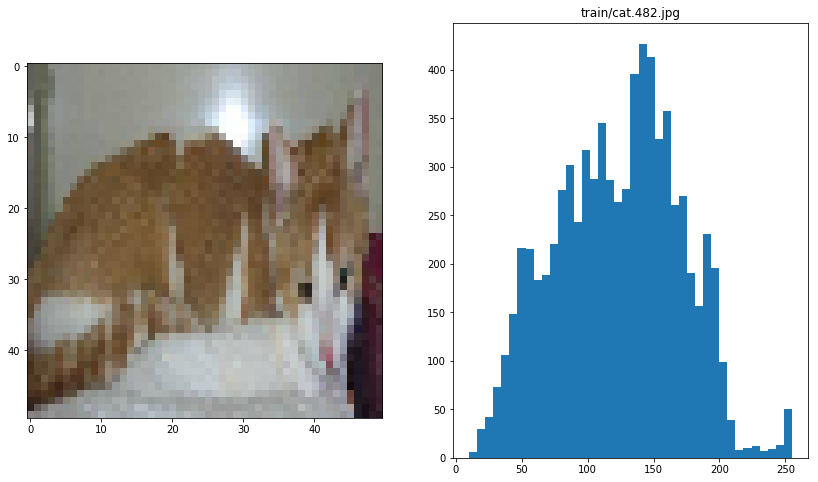

In [8]:

index_example = 31
fig,ax = plt.subplots(1,2,figsize=(14,8))
ax[0].imshow(train_features[index_example,]/255)
ax[1].set_title(train_files[index_example])
_ = ax[1].hist(train_features[index_example,].ravel(),bins=40)


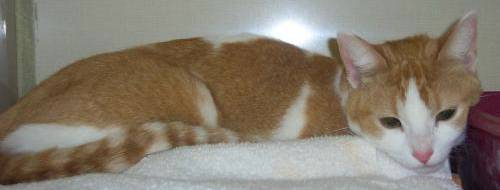

In [9]:
from IPython.display import Image,display

display(Image(train_files[index_example]))

## Preprocessing

In [8]:
#media = np.mean(train_features,axis=(0,2,3),keepdims=True)
#print(media.shape,media.ravel())

#media = media[:,np.newaxis,np.newaxis]
#train_features-=media
#val_features-=media
#test_features-=media

In [10]:
from keras.applications.imagenet_utils import preprocess_input

preprocesado = False

if not preprocesado:
    train_features = preprocess_input(train_features)
    val_features = preprocess_input(val_features)
    test_features = preprocess_input(test_features)
    preprocesado = True


151.061

## FC network

`keras` notation:
* *epoch*:  Each epoch is a full loop over **all** the training data.
* `nb_epoch`: Number of epochs to train the model. 
* `batch_size`: Number of samples to use in each *stochastic* gradient update.

For example, 80 epochs consist on 80 loops over all the training examples. If there are 1000 examples and batch size is set to 32 there will be 1000/32 * 80 gradient updates. Each gradient is estimated using 32 samples.

In [11]:
input_shape_flat = np.prod(input_image_shape)
train_features_flat = train_features.reshape((train_features.shape[0],input_shape_flat))
val_features_flat = val_features.reshape((val_features.shape[0],input_shape_flat))
test_features_flat = test_features.reshape((test_features.shape[0],input_shape_flat))
print(train_features_flat.shape,val_features_flat.shape,test_features_flat.shape)

(5000, 7500) (500, 7500) (500, 7500)


In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

train_fc_model = True

if train_fc_model:
    fc_model = Sequential([
        Dense(1024, input_dim=input_shape_flat),
        Activation('sigmoid'),
        Dense(512),
        Activation('sigmoid'),
        Dense(256),
        Activation('sigmoid'),
        Dense(1),
        Activation('sigmoid')
    ])

    fc_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    nb_epoch=20
    hist=fc_model.fit(train_features_flat,
                      train_labels, 
                      epochs=nb_epoch,validation_data=(val_features_flat,
                                                   val_labels),
                      batch_size=32,verbose=2)

    fc_model.save("fc_model.h5")
else:
    fc_model = keras.models.load_model("fc_model_trained.h5")
    

Train on 5000 samples, validate on 500 samples
Epoch 1/20
 - 4s - loss: 0.7047 - acc: 0.5206 - val_loss: 0.6902 - val_acc: 0.5200
Epoch 2/20
 - 4s - loss: 0.6848 - acc: 0.5474 - val_loss: 0.6800 - val_acc: 0.5640
Epoch 3/20
 - 3s - loss: 0.6851 - acc: 0.5552 - val_loss: 0.6762 - val_acc: 0.5600
Epoch 4/20
 - 4s - loss: 0.6760 - acc: 0.5774 - val_loss: 0.6806 - val_acc: 0.5520
Epoch 5/20
 - 3s - loss: 0.6689 - acc: 0.5798 - val_loss: 0.6756 - val_acc: 0.5640
Epoch 6/20
 - 4s - loss: 0.6648 - acc: 0.5922 - val_loss: 0.6736 - val_acc: 0.5940
Epoch 7/20
 - 3s - loss: 0.6615 - acc: 0.5952 - val_loss: 0.6749 - val_acc: 0.5780
Epoch 8/20
 - 4s - loss: 0.6600 - acc: 0.6010 - val_loss: 0.6801 - val_acc: 0.5520
Epoch 9/20
 - 4s - loss: 0.6536 - acc: 0.6150 - val_loss: 0.6705 - val_acc: 0.6000
Epoch 10/20
 - 3s - loss: 0.6519 - acc: 0.6098 - val_loss: 0.6597 - val_acc: 0.6040
Epoch 11/20
 - 4s - loss: 0.6463 - acc: 0.6156 - val_loss: 0.7031 - val_acc: 0.5060
Epoch 12/20
 - 4s - loss: 0.6474 - acc

In [9]:
fc_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              7681024   
_________________________________________________________________
activation_1 (Activation)    (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
__________

In [20]:
if train_fc_model:
    hist.history

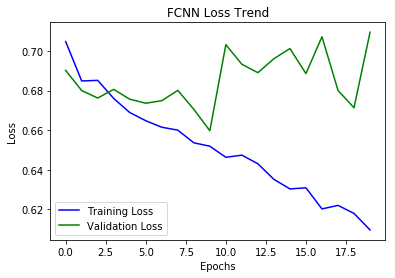

In [21]:
if train_fc_model:
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('FCNN Loss Trend')
    plt.plot(hist.history["loss"], 'blue', label='Training Loss')
    plt.plot(hist.history["val_loss"], 'green', label='Validation Loss')
    #plt.xticks(range(0,nb_epoch,2))
    plt.legend()

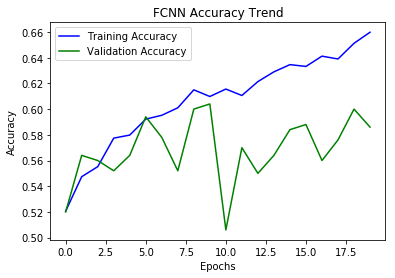

In [22]:
if train_fc_model:
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('FCNN Accuracy Trend')
    plt.plot(hist.history["acc"], 'blue', label='Training Accuracy')
    plt.plot(hist.history["val_acc"], 'green', label='Validation Accuracy')
    plt.legend()

In [25]:
results = fc_model.evaluate(test_features_flat,test_labels)
print("")
print(" ".join(["%s: %.4f"%(metric_name,valor) for metric_name,valor in zip(fc_model.metrics_names,results)]))

500/500 [==============================] - 0s 67us/step

loss: 0.7208 acc: 0.5520


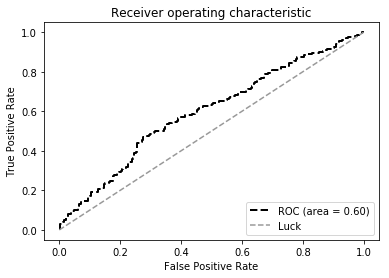

In [26]:
preds = fc_model.predict(test_features_flat)
dvc.plotROC(test_labels,preds)

## CNN

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping

train_cnn_model = True
def catdog_cnn(input_image_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3),input_shape=input_image_shape))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(64, 3, 3))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    
    model.add(Activation('sigmoid'))
    optimizer = Adam()
    objective = 'binary_crossentropy'
    model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])
    return model

if train_cnn_model:
    cnn_model = catdog_cnn(input_image_shape)
else:
    cnn_model = keras.models.load_model("cnn_model_trained.h5")
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
activation_9 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 46, 46, 32)        128       
_________________________________________________________________
activation_10 (Activation)   (None, 46, 46, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
__________

/home/gonzalo/miniconda3/envs/p36/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`


In [30]:
if train_cnn_model:
    nb_epoch=80
    print("Model compiled, start training")
    early_stopping_callback = EarlyStopping(monitor='val_loss', min_delta=0, patience=8, 
                                            verbose=1, mode='auto')
    history = cnn_model.fit(train_features, train_labels,validation_data=(val_features,val_labels),
                            batch_size=32, epochs=nb_epoch,verbose=2,callbacks=[early_stopping_callback])
    cnn_model.save("cnn_model.h5")


Model compiled, start training
Train on 5000 samples, validate on 500 samples
Epoch 1/80
 - 9s - loss: 0.7683 - acc: 0.5648 - val_loss: 0.6610 - val_acc: 0.6060
Epoch 2/80
 - 6s - loss: 0.6437 - acc: 0.6378 - val_loss: 0.7304 - val_acc: 0.6060
Epoch 3/80
 - 6s - loss: 0.6118 - acc: 0.6684 - val_loss: 0.6674 - val_acc: 0.6540
Epoch 4/80
 - 6s - loss: 0.5714 - acc: 0.7048 - val_loss: 0.6862 - val_acc: 0.6380
Epoch 00004: early stopping


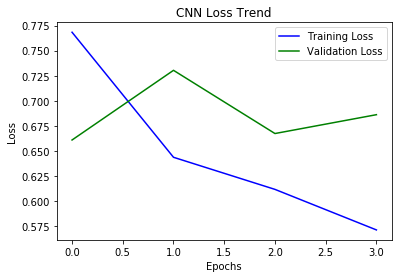

In [31]:
if train_cnn_model:
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('CNN Loss Trend')
    plt.plot(history.history["loss"], 'blue', label='Training Loss')
    plt.plot(history.history["val_loss"], 'green', label='Validation Loss')
    #plt.xticks(range(0,nb_epoch,2))
    plt.legend(loc="best")

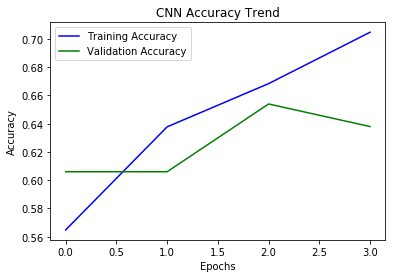

In [32]:
if train_cnn_model:
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('CNN Accuracy Trend')
    plt.plot(history.history["acc"], 'blue', label='Training Accuracy')
    plt.plot(history.history["val_acc"], 'green', label='Validation Accuracy')
    plt.legend(loc="best")

In [33]:
# evaluate the model
results = cnn_model.evaluate(test_features,test_labels)
print("")
print(" ".join(["%s: %.4f"%(metric_name,valor) for metric_name,valor in zip(cnn_model.metrics_names,results)]))

500/500 [==============================] - 0s 534us/step

loss: 0.6543 acc: 0.6820


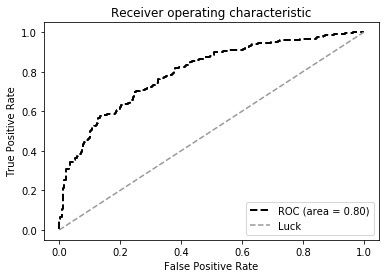

In [34]:
preds = cnn_model.predict(test_features)
dvc.plotROC(test_labels,preds)

Things to explore:
* Use more data.
* Data augmentation. [ImageDataGenerator](https://keras.io/preprocessing/image/)
* Icrease regularization
* Save best model (instead of geting the latest) [ModelCheckPoint](https://keras.io/callbacks/)
* Test differences running in gpu vs cpu.